<a href="https://colab.research.google.com/github/barbarabhenr/mc102/blob/master/Projeto2_MS629_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto 2 - MS629**

##`Bárbara Bueno Henriques` - **`167002`**
##`Carlos Henrique Martins Cayres` - **`145646`**
##`Gabriela Alves Gomes Delavald` - **`197588`**
##`Renata Trevisan Watanabe` - **`186543`**



>  Neste projeto faremos uma abordagem prática para algum problema de otimização não-linear com restrição, baseado em exemplos reais e já existentes;


Um tanque cilíndrico fechado está sendo projetado para transportar pelo menos 20 pés cúbicos de produtos químicos. O metal para a parte superior e laterais custa US2 por pé quadrado, mas o metal mais pesado da base custa US8 por pé quadrado. Além disso, a altura do tanque não pode ser superior a
duas vezes seu diâmetro para evitar que seja pesado. A ideia é formular um programa de minimização não-linear restrita a fim de encontrar um projeto do tanque com custo mínimo, em que as variáveis são dadas por:\
\
$x_1$=: diâmetro do tanque \
$x_2$=: altura do tanque \

> Com isso, a função que queremos minimizar a fim de otimizar o custo do design do tanque cilíndrico é dada por:


$min$ $f(x)=2*(\pi*x_1x_2 + \pi*(x_1^2)/4 + 8*(\pi*(x_1^2)/4)$;

\\
de modo que a primeira função de desigualdade representada abaixo é referente 
ao volume e as duas últimas funções são referentes à relação altura-diâmetro. 
Dessa forma, aplicamos o problema de minimização restrita não-linear a fim de encontrarmos o ponto $x^*=(x_1,x_2)$ que otimize a função, de tal forma que, pelo problema fornecido, temos apenas funções de desigualdade (designadas por $g(x)$) e, assim, nenhuma função de igualdade (comumente designadas por $h(x)$). Então, com a função $g$ não ativa, pudemos implementar o programa de tal modo que no ponto em que começa (representado no gráfico), a função permanece não-ativa; porém, como foi viável encontrar o ponto ótimo $x^*$, ambas as funções $g_1$ e $g_2$ tornam-se ativas, pois o ponto que buscamos encontra-se na intersecção de tais restrições de desigualdade, representado no gráfico.

O ponto encontrado deve satisfazer a CN1 (KKT) sendo essa: $\nabla f(x) + \lambda*\nabla h(x) + \mu*\nabla g(x) = 0$, sendo $\mu = 0$ para as restrições não ativas. Como já dito ambas as restrições $g_1$ e $g_2$ serão ativas então teremos também que $\mu_j > 0$ para $j =1,2$.



In [ ]:
import numpy as np
from scipy.optimize import minimize

![](https://i.ibb.co/5jsYKhN/download.png)

In [ ]:
#Função a ser minimizada
def func(x):
  return 2*((np.pi * x[0] * x[1]) + (np.pi * x[0]**2)/4) + 8* (np.pi*x[0]**2)/4

![](https://i.ibb.co/1TMcqvS/Captura-de-Tela-2021-01-14-a-s-00-14-42.png)


In [ ]:
# Restrições de desigualdade
def g1(x):
  return (((np.pi* x[0]**2 * x[1]) / 4) - 20)

def g2(x):
  return (-1)*(x[1] - 2*x[0])

def g3(x):
  return x[0]

def g4(x):
  return x[1]

g1_const = {'type': 'ineq', 'fun': g1 }
g2_const = {'type': 'ineq', 'fun': g2 }
g3_const = {'type': 'ineq', 'fun': g3 }
g4_const = {'type': 'ineq', 'fun': g4 }

In [ ]:
restr = [g1_const, g2_const, g3_const, g4_const]

Neste problema nao foram necessárias restrições de igualdade; porém,  caso fosse preciso, poderíamos defini-las da seguinte forma:

In [ ]:
# Restrições de igualdade
def h1(x):
  return x[0]**2 - 50  # h1(x) = x1**2 - 5 = 0 

def h2(x):
  return x[1] - 1.3 # h2(x) = x2 - 1,3 = 0
# Add quantos quiser . . .

h1_const = {'type': 'eq', 'fun': h1 }
h2_const = {'type': 'eq', 'fun': h2 }

    
### [Referencia scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)

In [ ]:
def min(func, X0, constraints):
  x_its = []
  x_its.append(np.array(X0, dtype= 'float'))
  result = minimize(func, X0, method= "SLSQP", callback= x_its.append, constraints= constraints)
  x_its.append(result.x)

  print("Após", result.nit, "Iterações")
  print("Solução X* = ", result.x)
  print("Com f(X*) = ", result.fun)
  
  return result.x, x_its

In [ ]:
x_sol, seq = min(func, [-1.5,-2.0], restr)

Após 9 Iterações
Solução X* =  [2.33508865 4.6701773 ]
Com f(X*) =  111.34480910204405


In [ ]:
# Configurando saida do grafico
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = (30,15)

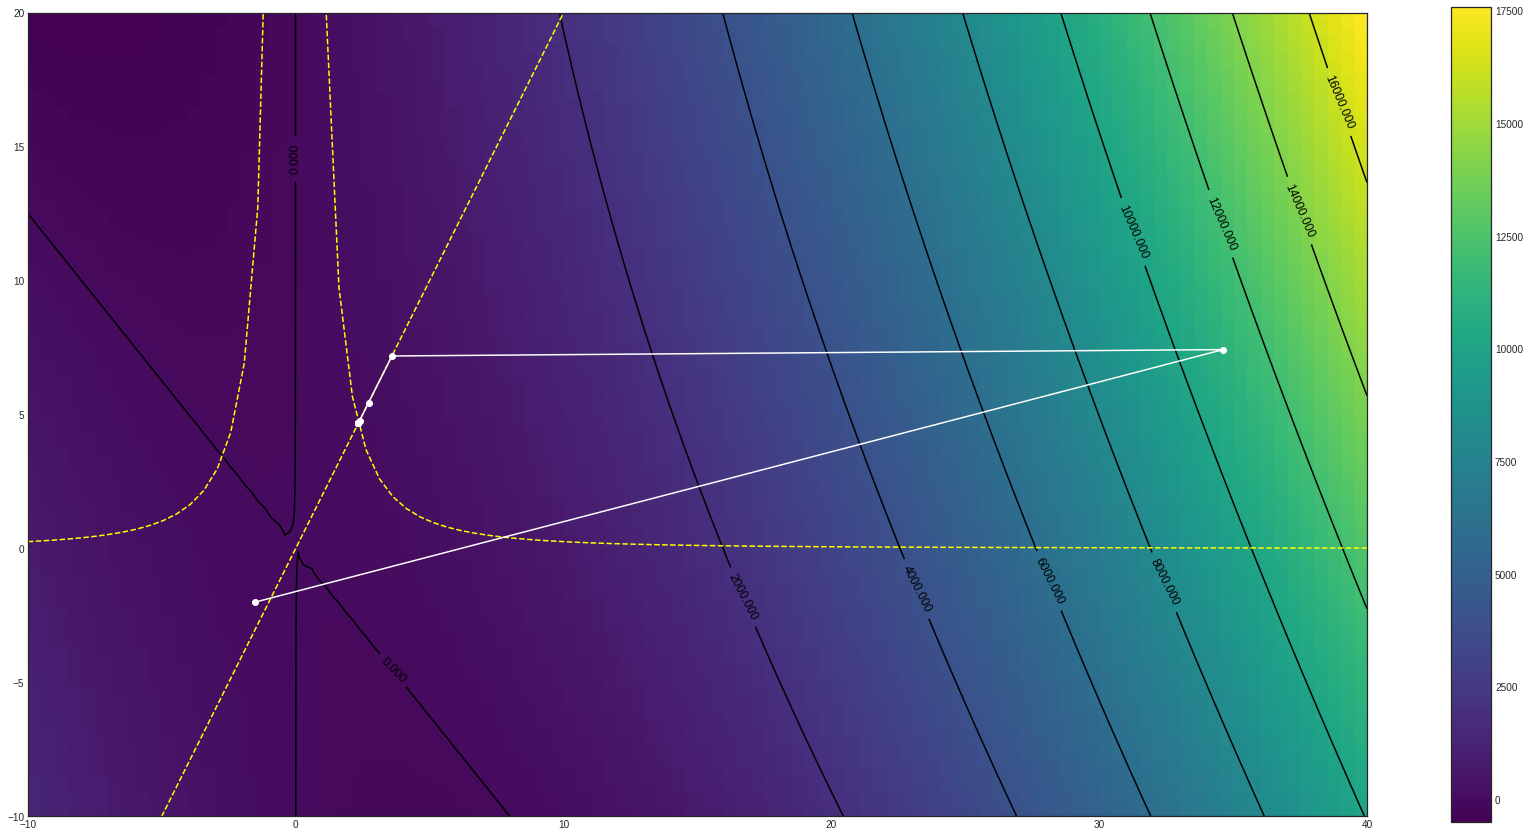

In [ ]:
# Região a ser mostrada no grafico
x_ls = np.linspace(-10, 40, 100)
y_ls = np.linspace(-10, 20, 100)
X, Y = np.meshgrid(x_ls, y_ls)
Z = func([X,Y])

# Definindo propriedades de plot para as curvas de nivel da função objetivo func(x)
contours = plt.contour(X, Y, Z, 10, colors='black')
plt.imshow(Z, extent=[-10, 40, -10, 20], origin='lower', cmap='viridis', alpha= 1)
plt.clabel(contours, inline=True, fontsize=12)
plt.colorbar();

# Reescrevendo g1(x) e g2(x) para podermos adicionar no grafico
def plotG1(x): return 20 * 4 / (np.pi * x**2)
def plotG2(x): return 2*x

xs = [x[0] for x in seq]
ys = [x[1] for x in seq]

plt.plot(x_ls, plotG1(x_ls), '--', color='yellow', scaley= False, scalex= False) #Definindo propriedades de plot da curva plotG1
plt.plot(x_ls, plotG2(x_ls), '--', color='yellow', scaley= False, scalex= False) #Definindo propriedades de plot da curva plotG2
plt.plot(xs, ys, '-ok', color='white', scaley= False, scalex= False) #Definindo propriedades de plot dos pontos obtidos no metodo

plt.show()

***Conclusão:***\
Com a implementação do programa acima, utilizando os comandos de otimização restrita não-linear, foi possível encontrar o $x^*$ ótimo que buscávamos, de modo a possibilitar também a representação do problema no gráfico com as restrições.